In [1]:
import numpy as np
import pandas as pd
from ggplot import *
import statsmodels.api as sm

In [2]:
train = pd.read_csv("train.csv")
store = pd.read_csv("store.csv")

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
# Converting Date into datetime
train['Date'] = pd.to_datetime(train['Date'])

In [6]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [7]:
store = store.fillna(0)

In [8]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [9]:
combine = pd.merge(train, store, on='Store')

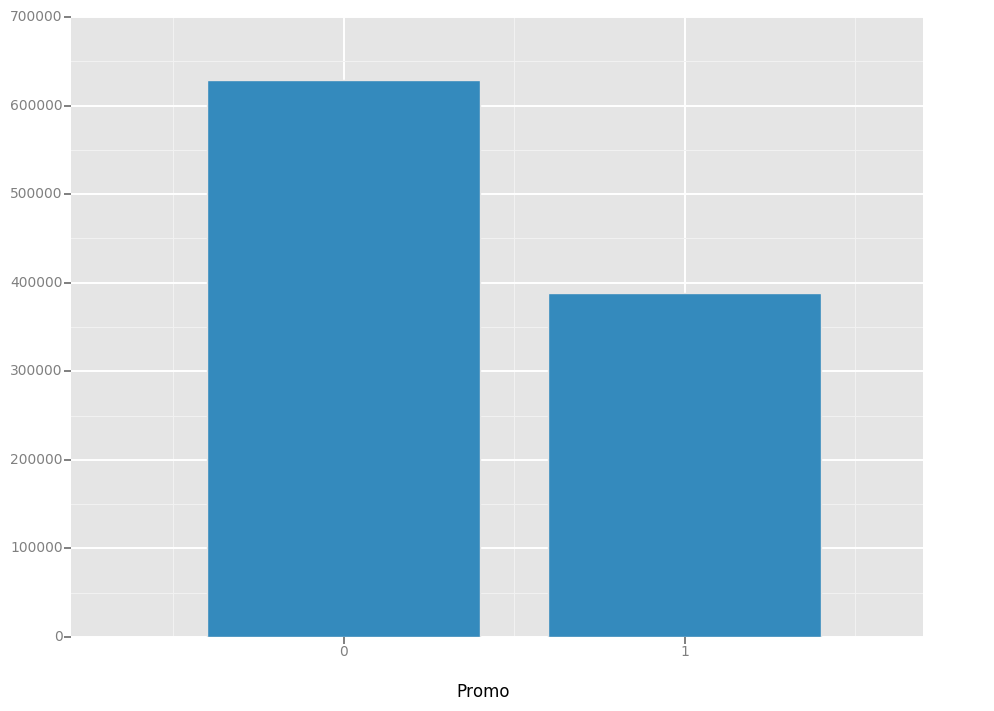

<ggplot: (8734507509424)>

In [27]:
a = ggplot(aes(x='Promo'), data=train) + geom_bar(stat='bin')

In [25]:
a.save('a.png', height=3, width=4)

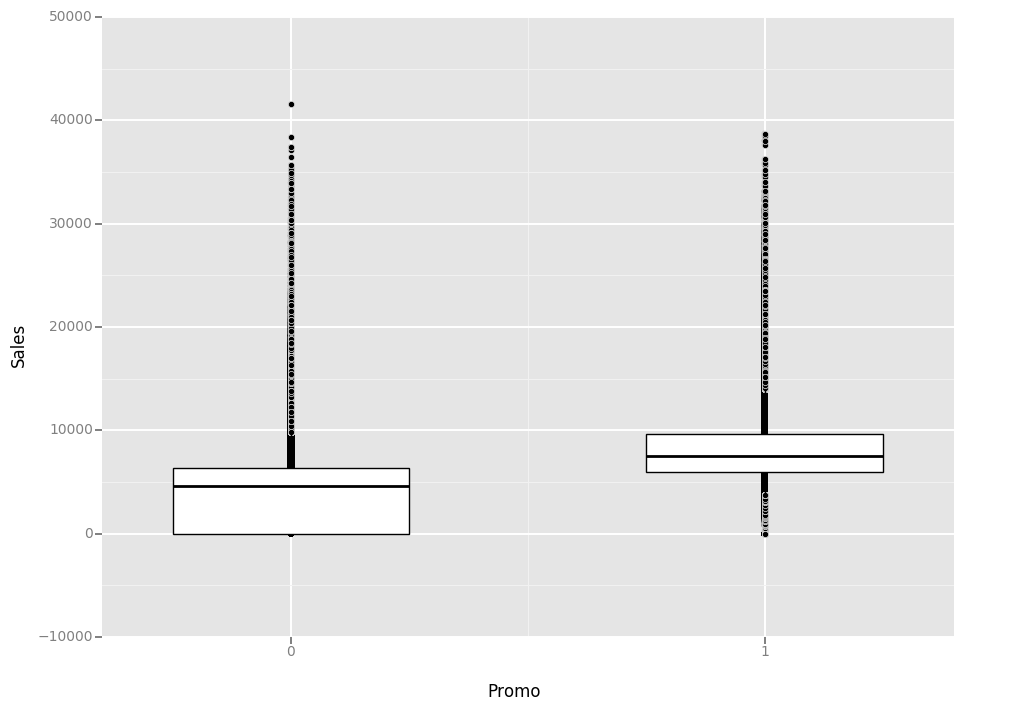

<ggplot: (-9223363302347185555)>

In [11]:
ggplot(aes(x='Promo', y='Sales'), data=combine) + geom_jitter(alpha=0.1) + geom_boxplot(color='red', fill=None) 

In [12]:
# ggplot(aes(x='Promo2', y='Sales'), data=combine) + geom_jitter(alpha=0.1) + geom_boxplot(color='red', fill=None) 

In [13]:
# combine[combine['Promo'] == 1].shape[0] / combine.shape[0]

In [14]:
# combine

In [15]:
# ggplot(aes(x='Promo'), data=combine[combine['Promo2'] == 0]) + geom_bar(stat='bin')

In [16]:
# train_cols = ['Sales', 'SchoolHoliday']
# logit = sm.Logit(combine['Promo'], combine[train_cols].astype(float))
# result = logit.fit()

In [17]:
# result.summary()

In [18]:
# ggplot(aes(x='Sales'), data=combine[combine['Promo'] == 1]) + geom_histogram(binwidth=10)